In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as tck
#import matplotlib.dates as mdates
#import matplotlib.dates as dates
import matplotlib.ticker as ticker

In [8]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#Ordenemos el df por fecha en orden ascendente
df.sort_values(by=['Date'], inplace=True) # inplace: sobre escribe el df original
df = df.reset_index()
del df['index']
#Convertimos comulna Date a tiempo en pandas
df['Date'] = pd.to_datetime(df['Date'])
#Convertimos los grados celcius in escala normal
df['Data_Value'] = df['Data_Value']/10.0
#creamos una columna con años y otra con mes-dia
df['Year'] = df['Date'].dt.year
df['Month_day'] = df['Date'].dt.strftime('%m-%d')
#Eliminamos el 29 de febrero de todo el df
febrero_29th = (df['Month_day']!='02-29')
df = df[febrero_29th]
#Creamos condiciones para seleccionar los datos
period_2005_2014 = (df['Year']>= 2005) & (df['Year']<= 2014)
period_2015 = (df['Year'] == 2015)
only_TMAX = (df['Element']=='TMAX')
only_TMIN = (df['Element']=='TMIN')

In [3]:
#Agrupamos por mes-dia y seleccionamos valor maximo de temperatura por grupo
Tmax_df = df[period_2005_2014 & only_TMAX].groupby(['Month_day'])['Data_Value'].max() 
Tmin_df = df[period_2005_2014 & only_TMIN].groupby(['Month_day'])['Data_Value'].min()
Tmax_df = Tmax_df.reset_index()
Tmax_df = Tmax_df.rename(columns={'Data_Value':'MaxT'})
Tmax_df = Tmax_df.set_index('Month_day')
Tmin_df = Tmin_df.reset_index()
Tmin_df = Tmin_df.rename(columns={'Data_Value':'MinT'})
Tmin_df = Tmin_df.set_index('Month_day')
#Creamos el data frame con los valores para el año 2015
df_scatter_max = df[period_2015 & only_TMAX].groupby(['Month_day'])['Data_Value'].max() 
df_scatter_min = df[period_2015 & only_TMIN].groupby(['Month_day'])['Data_Value'].min() 
df_scatter_max = df_scatter_max.reset_index()
df_scatter_max = df_scatter_max.rename(columns={'Data_Value':'MaxT_scat'})
df_scatter_max = df_scatter_max.set_index('Month_day')
df_scatter_min = df_scatter_min.reset_index()
df_scatter_min = df_scatter_min.rename(columns={'Data_Value':'MinT_scat'})
df_scatter_min = df_scatter_min.set_index('Month_day')


In [4]:
#Fusionamos los 2 dataframes con las temperaturas extremas
ext_Temp = pd.merge(Tmax_df, Tmin_df, how='inner', left_index=True, right_index=True)
#ext_Temp = ext_Temp.reset_index()

#Fusionamos los 2 scatter df
ext_Temp_scat = pd.merge(df_scatter_max, df_scatter_min, how='inner', left_index=True, right_index=True)
#ext_Temp_scat = ext_Temp_scat.reset_index()

#Fusionamos los 2 data frames
final_df = pd.merge(ext_Temp, ext_Temp_scat, how='inner', left_index=True, right_index=True)
final_df = final_df.reset_index()

In [5]:
final_df['Month_day'] = pd.to_datetime(final_df['Month_day'], format='%m%d', errors='ignore')

In [6]:
Tmax = final_df['MaxT']
Tmin = final_df['MinT']
date = final_df['Month_day']

Tmax_scat = final_df['MaxT_scat']
Tmin_scat = final_df['MinT_scat']

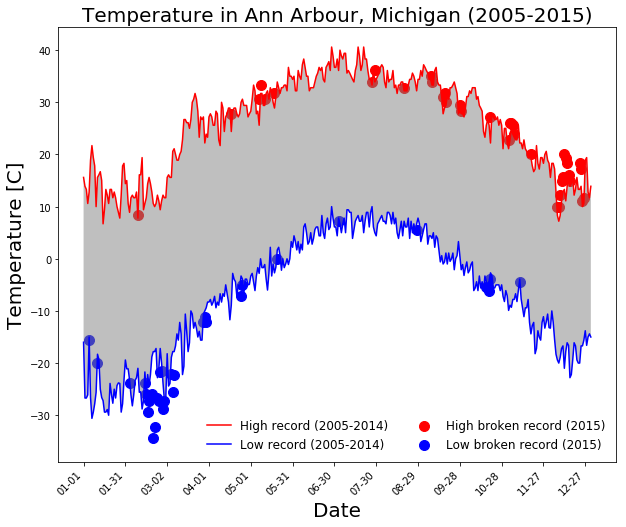

In [7]:
fig,ax= plt.subplots(figsize=(10,8))
plt.title('Temperature in Ann Arbour, Michigan (2005-2015)', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature [C]', fontsize=20)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=30))

plt.xticks(rotation=45, ha='right')

condition_high = (Tmax_scat>Tmax)
condition_low = (Tmin_scat<Tmin)

plt.plot(date, Tmax, '-', color='r', label='High record (2005-2014)')
plt.plot(date, Tmin, '-', color='b', label='Low record (2005-2014)')
plt.scatter(date[condition_high], Tmax_scat[condition_high], c='r', s=100, label='High broken record (2015)' )
plt.scatter(date[condition_low], Tmin_scat[condition_low], c='b', s=100, label='Low broken record (2015)' )

#fill between lines
ax.fill_between( range(len(date)), Tmin, Tmax, facecolor='grey', alpha=0.5 )

#legend
plt.legend(loc='lower right', ncol = 2, frameon=False, fontsize = 12)

plt.savefig('Assignment2.pdf')